# Students Do: Predicting Fraudulent Loans Applications

According to the American Bankers Association, [every dollar of fraud costs banks and credit unions roughly $2.92](https://www.aba.com/member-tools/industry-solutions/insights/state-card-fraud-2018). That's a reason why predicting fraud using machine learning techniques is a [broad area of research](https://scholar.google.com.mx/scholar?q=fraud+detection+machine+learning&btnG=&oq=fraud+detection+) and a great [business opportunity for FinTech startups](https://www.eu-startups.com/2019/06/paris-based-fintech-bleckwen-raises-e8-8-million-for-its-fraud-detection-software-to-prevent-financial-crime/).

In this activity, you will explore how tree-based algorithms can be used to identify fraudulent loan applications. You will start by using a decision tree model trained with the `sba_loans_encoded.csv` file that you created earlier.

In [1]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [4]:
# Loading data
df_loans = pd.read_csv(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 11\2\04-Stu_Predicting_Fraud\Resources\sba_loans_encoded.csv')

df_loans.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


## Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [7]:
# Define features set
X = df_loans.copy()

X.drop("Default", axis=1, inplace=True)
X.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [8]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

## Split the data into training and testing sets.

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=78)


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [16]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [17]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [19]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [20]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [21]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [22]:
# Making predictions using the testing data
predictions = model.predict(X_test)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(cm, 
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [26]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print()
print(f"Accuracy score: {acc_score}")
print()
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,344,0
Actual 1,181,0



Accuracy score: 0.6552380952380953

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       344
           1       0.00      0.00      0.00       181

    accuracy                           0.66       525
   macro avg       0.33      0.50      0.40       525
weighted avg       0.43      0.66      0.52       525



C:\Users\TribThapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TribThapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TribThapa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

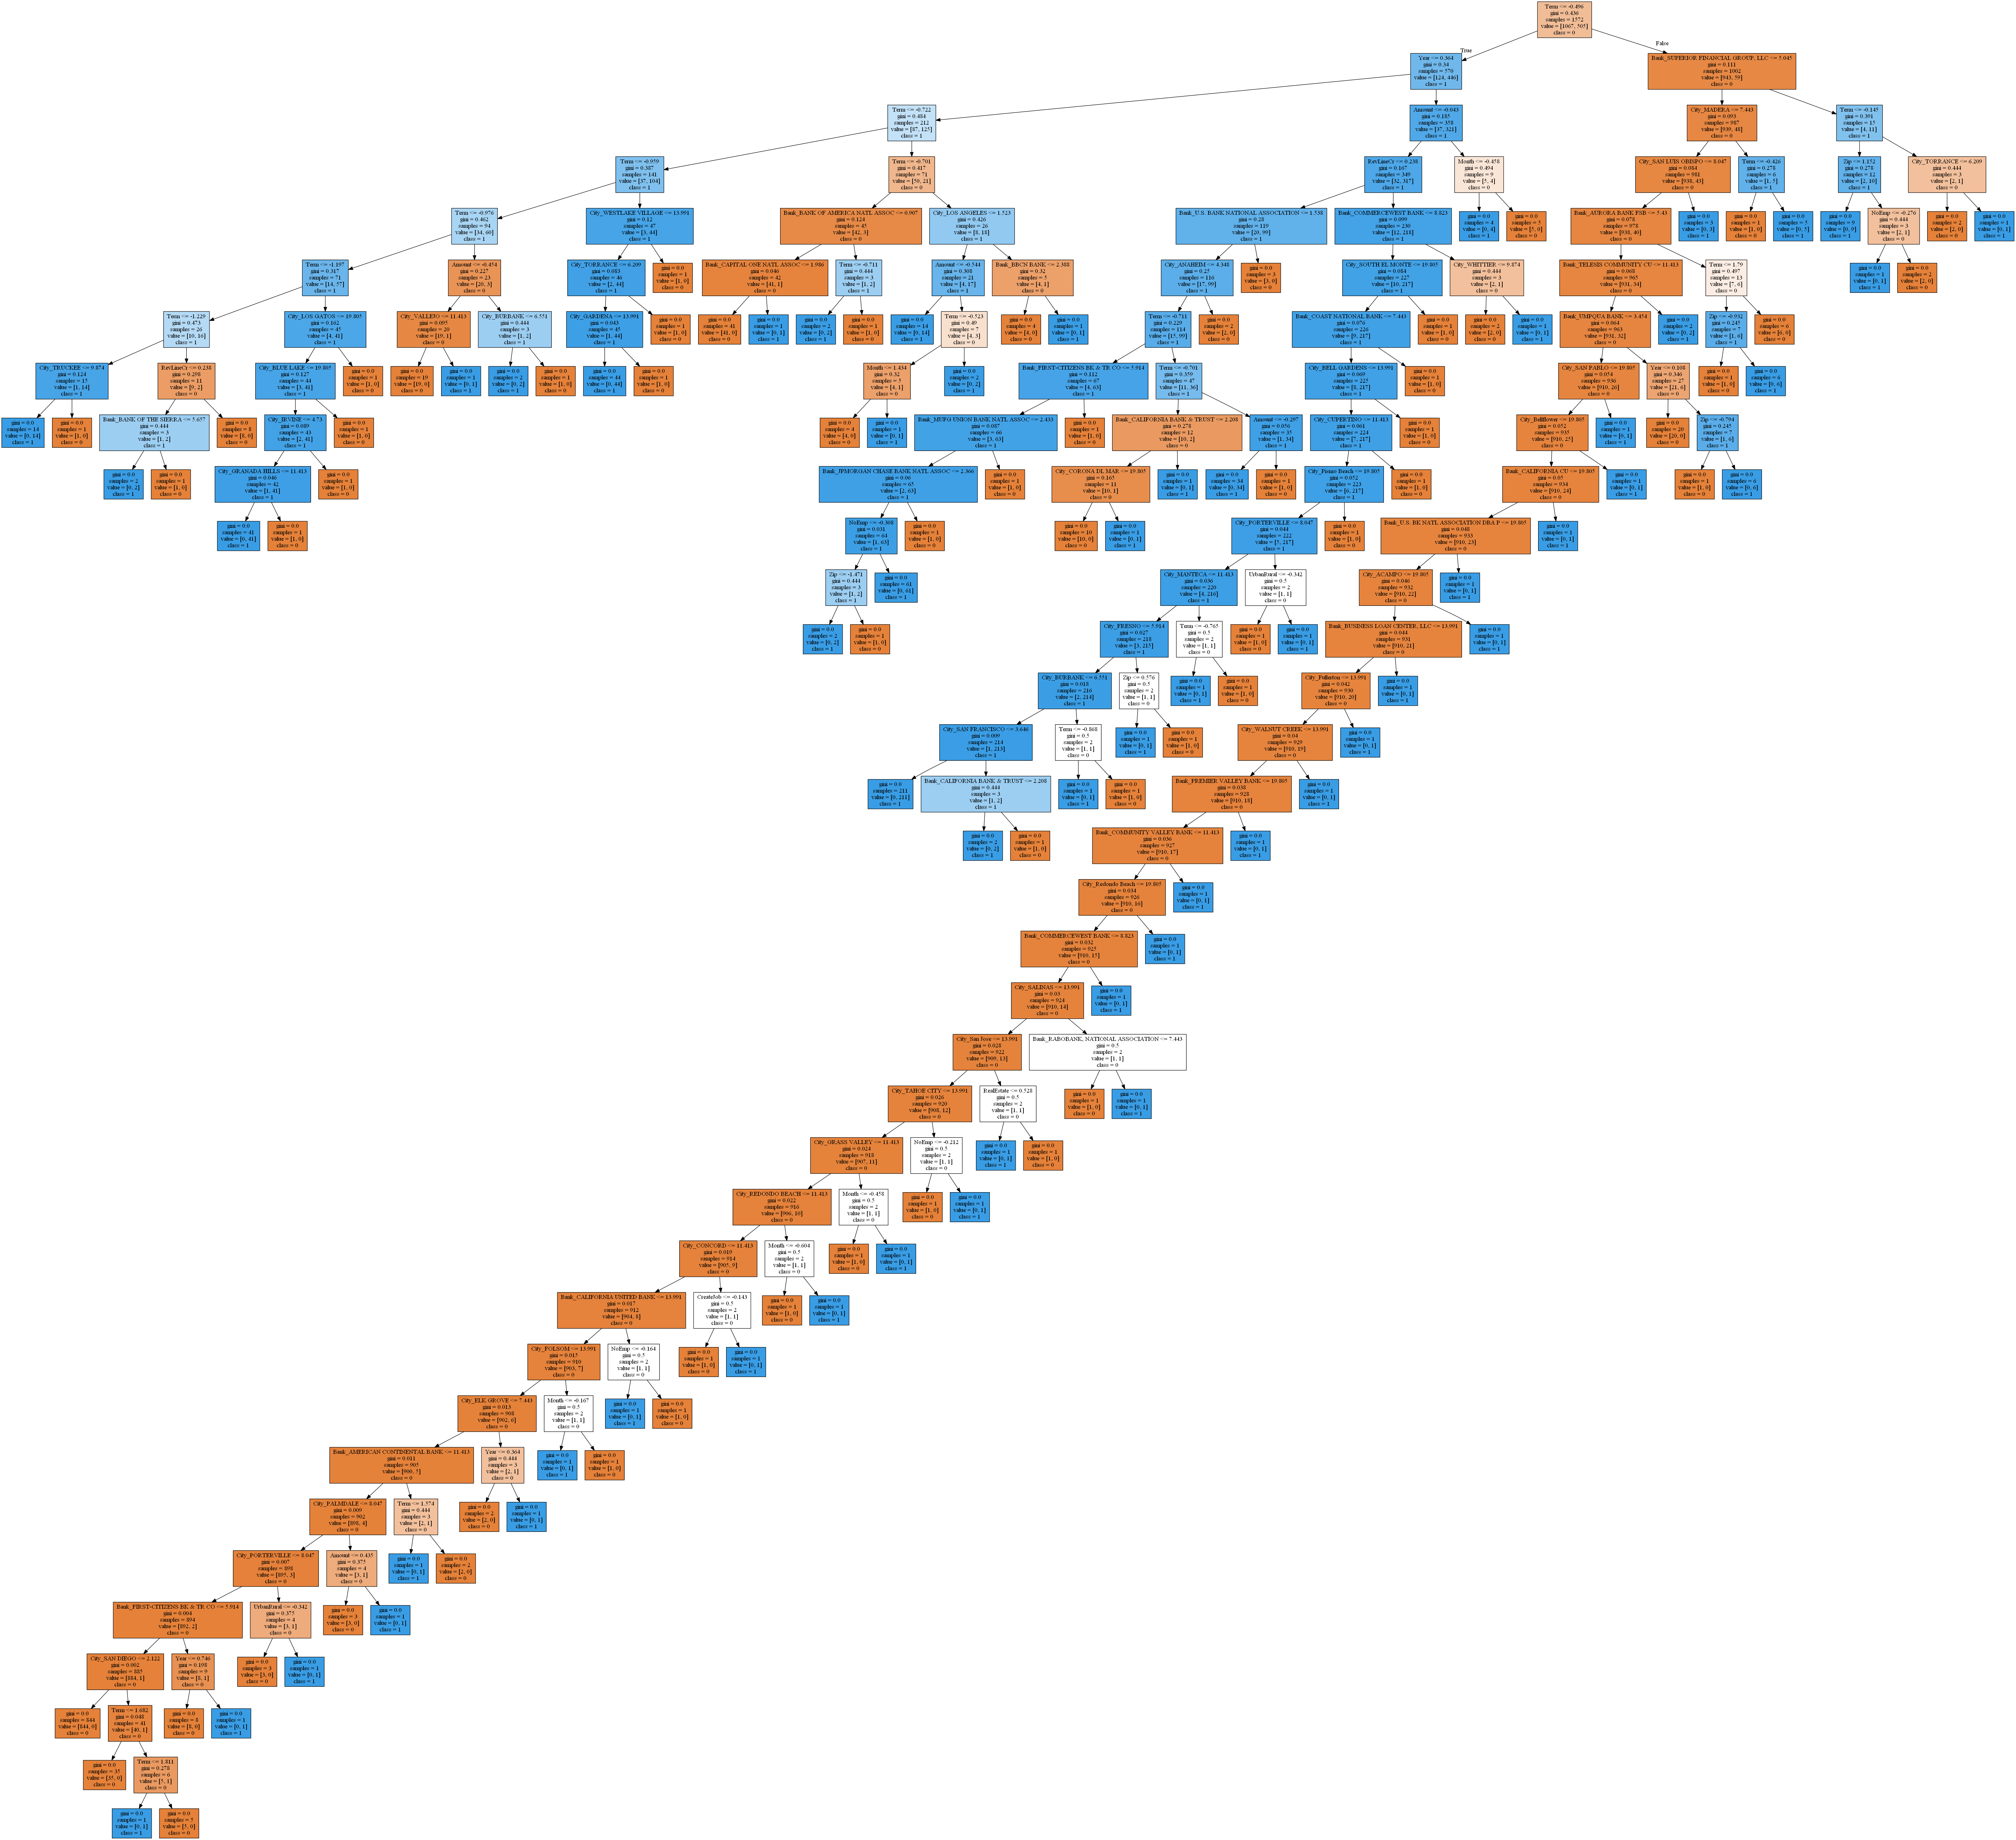

In [27]:
# Create DOT data
dot_data = tree.export_graphviz(model, 
                                out_file=None, 
                                feature_names=X.columns,
                                class_names=["0", "1"],
                                filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [28]:
# Saving the tree as PDF
file_path = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week11_19072021\Day2\bankloan_stu.pdf')
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\MyFinTechHomework\Week11_19072021\Day2\bankloan_stu.png')
graph.write_png(file_path)


True

## Analysis Question

Finally, analyze the model's evaluation results and answer the following question.

* Would you trust this model to deploy a loan application approval solution in a bank?

 * No, because it has very low precision, recall, and accuracy